[<img align="right" width="400" height="100" src="https://www.tu-braunschweig.de/typo3conf/ext/tu_braunschweig/Resources/Public/Images/Logos/tu_braunschweig_logo.svg">](https://www.tu-braunschweig.de/en/) 

[Mehdi Maboudi](https://www.tu-braunschweig.de/en/igp/staff/mehdi-maboudi) \([m.maboudi@tu-bs.de](m.maboudi@tu-bs.de)) and [Pedro Diaz](https://www.tu-braunschweig.de/en/igp/staff/pedro-diaz) (p.diaz@tu-bs.de)

[Technical University of Braunschweig](https://www.tu-braunschweig.de/en/)  
[Institute of Geodesy and Photogrammetry](https://www.tu-braunschweig.de/igp)  


**Image classification using MLP**  

# Deep Learning Entry Task

## 1. Import all necessary packages

In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import seaborn as sns
import cv2
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## 2. Load the [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist]) for image classification and show some samples 
It is also available in [PyTorch datasets](https://pytorch.org/vision/stable/datasets.html) and [TensorFlow datasets](https://www.tensorflow.org/datasets)

### 2.1 Loading the dataset

In [39]:
(train_dataset, test_dataset), info = tfds.load('fashion_mnist', split=['train', 'test'], with_info=True)
class_names = info.features['label'].names
print("Class labels: {}".format(info.features['label'].names))
print("Numbers of training examples: {}".format(info.splits['train'].num_examples))
print("Numbers of test examples: {}".format(info.splits['test'].num_examples))

Class labels: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Numbers of training examples: 60000
Numbers of test examples: 10000


### 2.2 Visualizing the dataset

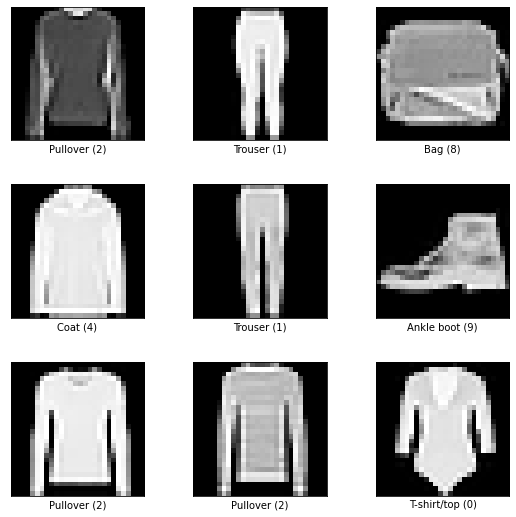

In [40]:
fig = tfds.show_examples(train_dataset, info, rows=3, cols=3)

## 3. Create a **Multi Layer Perceptron (MLP)** for image classification.
Feel free to use any configuration and framework for its implementation (Keras, Tensorflow, Pytorch, etc.)

In [41]:
def preprocessing(item):
  return (item["image"] / 255, item["label"])

In [42]:
train_dataset = train_dataset.map(preprocessing)
test_dataset = test_dataset.map(preprocessing)

In [43]:
batch_size = 64
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.shuffle(buffer_size = 1024, seed = 0)
train_dataset = train_dataset.batch(batch_size = batch_size)
train_dataset = train_dataset.prefetch(buffer_size = 1)

In [44]:
test_dataset = test_dataset.cache().batch(batch_size)

In [64]:
# 2 hidden layers and one softmax output layer
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [48]:
steps = 60000//64

## 4. Train the model

In [49]:
history = model.fit(
    train_dataset,
    batch_size=64,
    epochs=30,
    verbose=1,
    steps_per_epoch=steps,
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


937/937 [==============================] - 10s 10ms/step - loss: 0.5362 - sparse_categorical_accuracy: 0.8141
Epoch 2/30
937/937 [==============================] - 5s 5ms/step - loss: 0.3930 - sparse_categorical_accuracy: 0.8578
Epoch 3/30
937/937 [==============================] - 5s 5ms/step - loss: 0.3508 - sparse_categorical_accuracy: 0.8730
Epoch 4/30
937/937 [==============================] - 5s 5ms/step - loss: 0.3269 - sparse_categorical_accuracy: 0.8797
Epoch 5/30
937/937 [==============================] - 5s 5ms/step - loss: 0.3055 - sparse_categorical_accuracy: 0.8869
Epoch 6/30
937/937 [==============================] - 5s 5ms/step - loss: 0.2925 - sparse_categorical_accuracy: 0.8916
Epoch 7/30
937/937 [==============================] - 5s 5ms/step - loss: 0.2821 - sparse_categorical_accuracy: 0.8935
Epoch 8/30
937/937 [==============================] - 5s 5ms/step - loss: 0.2690 - sparse_categorical_accuracy: 0.9006
Epoch 9/30
937/937 [==============================] - 5s 

## 5. Plots
Plot the evolution of the Loss function and Accuracy values over the epochs during training.

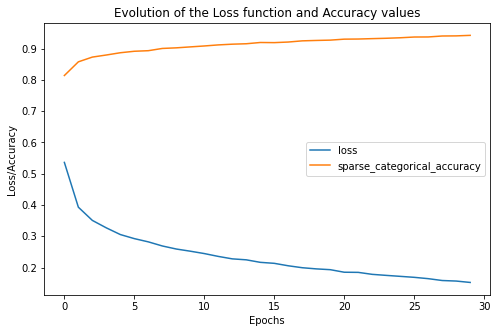

In [50]:
history_frame = pd.DataFrame(history.history)
history_frame.plot(figsize=(8, 5))
plt.title("Evolution of the Loss function and Accuracy values")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.show()
model.save("model.h5")

## 6. Run inference
Run inference in the test set and compute the metrics for testing.

In [52]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(10000//64)) #10000 :test samples available
print('Accuracy on test dataset:', test_accuracy)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


156/156 [==============================] - 3s 19ms/step - loss: 0.3950 - sparse_categorical_accuracy: 0.8809
Accuracy on test dataset: 0.8809094429016113


## 7. Test samples
Show some samples from the test set: image, reference class and predicted class.

In [53]:
#transfrom it into numpy
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

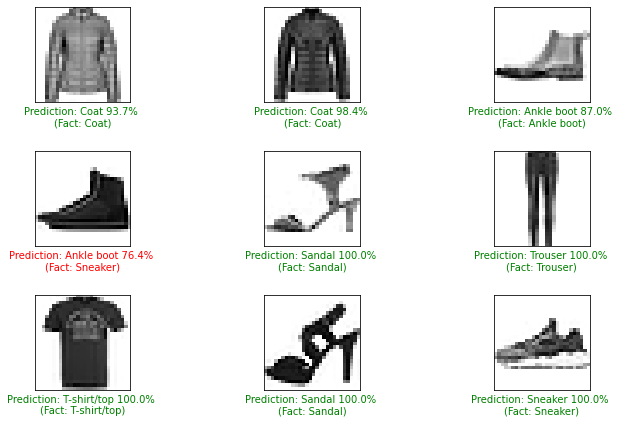

In [55]:
def test_sample_plot(index, predictions, true_labels, images):
  predictions, true_label, img = predictions[index], true_labels[index], images[index]
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("Prediction: {} {:2.1f}% \n(Fact: {})".format(class_names[predicted_label],
                                                            100*np.max(predictions),
                                                            class_names[true_label]),
                                                            color=color)
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2.5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  test_sample_plot(i, predictions, test_labels, test_images)

## 8. Testing with rotation
Choose one image from the test set, apply a rotation (e.g. 30°, 45°, 60°).

In [56]:
#pick one image from whole dataset
for test_images, test_labels in test_dataset.take(1):
    test_image = test_images
    test_label = test_labels

Text(0.5, 0, 'Coat')

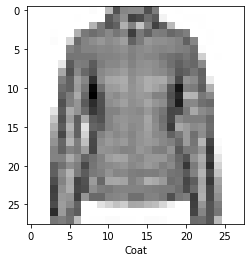

In [57]:
img = test_image[0]
label = test_label[0]
plt.imshow(img[...,0], cmap=plt.cm.binary)
plt.xlabel(class_names[label])

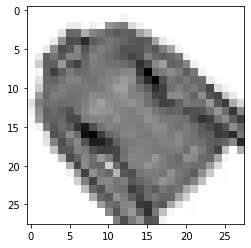

In [58]:
center=tuple(np.array([28,28])/2)
#rotate it with 45 degree
rot_mat = cv2.getRotationMatrix2D(center,45,1.0)
new_image = cv2.warpAffine(img[...,0].numpy(), rot_mat, (28,28))
plt.imshow(new_image, cmap=plt.cm.binary)

## 9. Comparison
Compare the predicted classes before and after the rotation. Is there any change? If yes, what would be the reason for it?

Answer:
Yes,
the reason would be that we only train with whole picture. If we train the model with decomposed feature which is CNN, then we can overcome this rotation problem. we usually will manipulate our limted data with mirror and rotation for getting more valid data.

Text(0.5, 0, 'Prediction: Shirt 94% \n(Truth: Coat)')

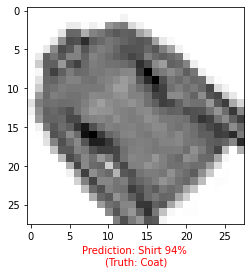

In [59]:
plt.imshow(new_image, cmap=plt.cm.binary)
rotated_image = np.expand_dims(new_image, axis=0)
prediction = model.predict(rotated_image)
predicted_label = np.argmax(prediction)
true_label = label
if predicted_label == true_label:
    color = 'green'
else:
    color = 'red'
plt.xlabel("Prediction: {} {:2.0f}% \n(Truth: {})".format(class_names[predicted_label],
                                100*np.max(prediction),
                                class_names[true_label]),
                                color=color)

## 10. Testing with new image
Test the model with another image (from internet or take a photo with your phone). Do not forget to convert the image to the Fashion MNIST format: grayscale, $28\times 28$. Comment the results.

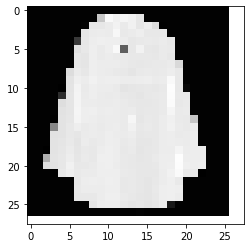

In [62]:
raw = tf.io.read_file('coat.png')
image = tf.image.decode_image(raw, channels=3)
image = tf.image.rgb_to_grayscale(image, name=None)
normalized_image = tf.image.resize_with_pad(image, 28, 28, antialias=False)
expanded_image = tf.expand_dims(normalized_image, axis=0)
expanded_image = tf.cast(expanded_image, dtype=tf.float64)
plt.imshow(np.squeeze(expanded_image), cmap=plt.cm.binary)

In [63]:
#get the probability
prediction = model.predict(expanded_image)
#get the most likely prediction
pred_label = np.argmax(prediction)
print(class_names[pred_label])
print("{:2.1f}%".format(100*np.max(prediction)))

Ankle boot
100.0%



## 11. How could we improve the trained model?

There are many methods we learned in the course. For example: Dropout, Initialization, adjusting batch sizes, increasing the number of neurons in the hidden layer and using different optimizer rather than Adam.

In my case of predicting the image from the internet, i think increasing the resolution will help a lot since those clothes or shoes usually have more feature than digits. Therefore, i would say 28*28 resolusion is too low.
Also, if we try to solve rotation problem in rotation, we need to use CNN to learn how to recognize the feature of items.